In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Kural Tabanlı Sınıflandırma (Segmentasyon) Nedir?

Segmentasyon, markaların veya firmaların ilgili olduğu pazarı bölümlere ayırarak bu bölümlerden seçilen küçük pazara yönelik strateji oluşturmayı hedefleyen yönteme denmektedir. Öncelikle hedef müşteri kitlesini belirleyen şirketler, daha sonra segmentasyon yani bölümleme yaparlar.



Bu yöntem oldukça kolay anlaşılabilen ve hedef odaklı bir pazarlama çalışmasının ortaya konulmasını sağlamaktadır. Segmentasyon, seçilen alt pazarın hedef kitlesinin ihtiyaç, istek ve arzularına yönelik pazarlama stratejilerini üretmek için kullanılmaktadır.

# Kural Tabanlı Sınıflandırma ile Potansiyel Müşteri Getirisi Hesaplama


Değişkenler
SOURCE – Müşterinin bağlandığı cihaz türü
SEX – Müşterinin cinsiyeti
COUNTRY – Müşterinin ülkesi
AGE – Müşterinin yaşı

# Görev 1:

Soru 1: persona.csv dosyasını okutunuz ve veri seti ile ilgili genel bilgileri gösteriniz.

In [2]:
import pandas as pd
df=pd.read_csv("persona.csv")
df

,PRICE,SOURCE,SEX,COUNTRY,AGE
0,39,android,male,bra,17
1,39,android,male,bra,17
2,49,android,male,bra,17
3,29,android,male,tur,17
4,49,android,male,tur,17
...,...,...,...,...,...
4995,29,android,female,bra,31
4996,29,android,female,bra,31
4997,29,android,female,bra,31
4998,39,android,female,bra,31


In [3]:
df.shape

(5000, 5)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5000 entries, 0 to 4999
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   PRICE    5000 non-null   int64 
 1   SOURCE   5000 non-null   object
 2   SEX      5000 non-null   object
 3   COUNTRY  5000 non-null   object
 4   AGE      5000 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 234.4+ KB


Soru 2: Kaç unique SOURCE vardır? Frekansları nedir?

In [5]:
df["SOURCE"].value_counts().unique()

array([2974, 2026], dtype=int64)

In [6]:
df["SOURCE"].value_counts() #Hangi kategorinin ne kadar eleman içerdiği bilgisi bize frekansı verir.

android    2974
ios        2026
Name: SOURCE, dtype: int64

In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
PRICE,5000.0,34.1320,12.464897,9.0,29.0,39.0,39.0,59.0
AGE,5000.0,23.5814,8.995908,15.0,17.0,21.0,27.0,66.0


Soru 3: Kaç unique PRICE vardır?

In [8]:
df["PRICE"].value_counts().unique()

array([1305, 1260, 1031,  992,  212,  200], dtype=int64)

Soru 4: Hangi PRICE'dan kaçar tane satış gerçekleşmiş?

In [9]:
df["PRICE"].value_counts()

29    1305
39    1260
49    1031
19     992
59     212
9      200
Name: PRICE, dtype: int64

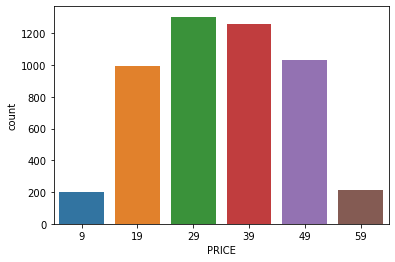

In [10]:
#Türler için bir sayım grafiği 
sns.countplot(x="PRICE", data=df, )
plt.show()

Soru 5: Hangi ülkeden kaçar tane satış olmuş?

In [11]:
df["COUNTRY"].unique()

array(['bra', 'tur', 'usa', 'can', 'deu', 'fra'], dtype=object)

In [12]:
df["COUNTRY"].value_counts()

usa    2065
bra    1496
deu     455
tur     451
fra     303
can     230
Name: COUNTRY, dtype: int64

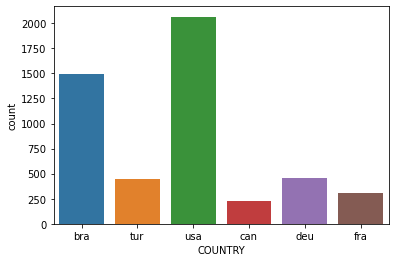

In [13]:
#Türler için bir sayım grafiği 
sns.countplot(x="COUNTRY", data=df)
plt.show()

Soru 6: Ülkelere göre satışlardan toplam ne kadar kazanılmış?

In [14]:
df.groupby(["COUNTRY"]).agg({"PRICE": ["count","sum"]})

PRICE       
        count    sum
COUNTRY             
bra      1496  51354
can       230   7730
deu       455  15485
fra       303  10177
tur       451  15689
usa      2065  70225

Soru 7: SOURCE türlerine göre göre satış sayıları nedir?

In [15]:
df.groupby(["SOURCE"]).count()

,PRICE,SEX,COUNTRY,AGE
SOURCE,,,,
android,2974,2974,2974,2974
ios,2026,2026,2026,2026


Soru 8: Ülkelere göre PRICE ortalamaları nedir?

In [16]:
df.groupby(["COUNTRY"]).agg({"PRICE": ["mean","min"]})

PRICE    
              mean min
COUNTRY               
bra      34.327540   9
can      33.608696   9
deu      34.032967   9
fra      33.587459   9
tur      34.787140   9
usa      34.007264   9

Soru 9: SOURCE'lara göre PRICE ortalamaları nedir?

In [17]:
df.groupby(["SOURCE"]).agg({"PRICE": ["count","mean","min","max","sum"]})

PRICE                           
        count       mean min max     sum
SOURCE                                  
android  2974  34.174849   9  59  101636
ios      2026  34.069102   9  59   69024

Soru 10: COUNTRY-SOURCE kırılımında PRICE ortalamaları nedir?

In [18]:
df.groupby(["COUNTRY","SOURCE"]).agg({"PRICE": ["mean"]})

PRICE
                      mean
COUNTRY SOURCE            
bra     android  34.387029
        ios      34.222222
can     android  33.330709
        ios      33.951456
deu     android  33.869888
        ios      34.268817
fra     android  34.312500
        ios      32.776224
tur     android  36.229437
        ios      33.272727
usa     android  33.760357
        ios      34.371703

# Görev 2:

COUNTRY, SOURCE, SEX, AGE kırılımında ortalama kazançlar nedir?

In [19]:
df_2 = df.groupby(["COUNTRY","SOURCE","SEX","AGE"]).agg({"PRICE": "mean"})
df_2

PRICE
COUNTRY SOURCE  SEX    AGE           
bra     android female 15   38.714286
                       16   35.944444
                       17   35.666667
                       18   32.255814
                       19   35.206897
...                               ...
usa     ios     male   42   30.250000
                       50   39.000000
                       53   34.000000
                       55   29.000000
                       59   46.500000

[348 rows x 1 columns]

# Görev 3:

Çıktıyı PRICE’a göre sıralayınız.

In [20]:
agg_df = df_2.sort_values(["PRICE"],ascending=False)
agg_df

PRICE
COUNTRY SOURCE  SEX    AGE       
bra     android male   46    59.0
usa     android male   36    59.0
fra     android female 24    59.0
usa     ios     male   32    54.0
deu     android female 36    49.0
...                           ...
usa     ios     female 38    19.0
                       30    19.0
can     android female 27    19.0
fra     android male   18    19.0
deu     android male   26     9.0

[348 rows x 1 columns]

In [21]:
agg_df = agg_df.groupby(["COUNTRY","SOURCE","SEX","AGE"]).agg({"PRICE": "mean"})
agg_df

PRICE
COUNTRY SOURCE  SEX    AGE           
bra     android female 15   38.714286
                       16   35.944444
                       17   35.666667
                       18   32.255814
                       19   35.206897
...                               ...
usa     ios     male   42   30.250000
                       50   39.000000
                       53   34.000000
                       55   29.000000
                       59   46.500000

[348 rows x 1 columns]

# Görev 4:

Index’te yer alan isimleri değişken ismine çeviriniz.

In [22]:
agg_df.reset_index(inplace=True)
agg_df

,COUNTRY,SOURCE,SEX,AGE,PRICE
0,bra,android,female,15,38.714286
1,bra,android,female,16,35.944444
2,bra,android,female,17,35.666667
3,bra,android,female,18,32.255814
4,bra,android,female,19,35.206897
...,...,...,...,...,...
343,usa,ios,male,42,30.250000
344,usa,ios,male,50,39.000000
345,usa,ios,male,53,34.000000
346,usa,ios,male,55,29.000000


# Görev 5:

age değişkenini kategorik değişkene çeviriniz ve agg_df’e ekleyiniz.

In [23]:
agg_df["new_age"]=pd.cut(agg_df["AGE"],[0,18,23,30,40,70]).apply(str).str.replace(", ","_")
agg_df


,COUNTRY,SOURCE,SEX,AGE,PRICE,new_age
0,bra,android,female,15,38.714286,(0_18]
1,bra,android,female,16,35.944444,(0_18]
2,bra,android,female,17,35.666667,(0_18]
3,bra,android,female,18,32.255814,(0_18]
4,bra,android,female,19,35.206897,(18_23]
...,...,...,...,...,...,...
343,usa,ios,male,42,30.250000,(40_70]
344,usa,ios,male,50,39.000000,(40_70]
345,usa,ios,male,53,34.000000,(40_70]
346,usa,ios,male,55,29.000000,(40_70]


In [24]:
agg_df.columns

Index(['COUNTRY', 'SOURCE', 'SEX', 'AGE', 'PRICE', 'new_age'], dtype='object')

# Görev 6:

Yeni seviye tabanlı müşterileri (persona) tanımlayınız.
▪ Yeni seviye tabanlı müşterileri (persona) tanımlayınız ve veri setine değişken olarak ekleyiniz.
▪ Yeni eklenecek değişkenin adı: customers_level_based
▪ Önceki soruda elde edeceğiniz çıktıdaki gözlemleri bir araya getirerek customers_level_based 
değişkenini oluşturmanız gerekmektedir

In [25]:
agg_df["customers_level_based"]=agg_df["COUNTRY"].str.upper()+"_"+agg_df["SOURCE"].str.upper()+"_"+agg_df["SEX"].str.upper()+"_"+agg_df["new_age"].str.upper()
agg_df

,COUNTRY,SOURCE,SEX,AGE,PRICE,new_age,customers_level_based
0,bra,android,female,15,38.714286,(0_18],BRA_ANDROID_FEMALE_(0_18]
1,bra,android,female,16,35.944444,(0_18],BRA_ANDROID_FEMALE_(0_18]
2,bra,android,female,17,35.666667,(0_18],BRA_ANDROID_FEMALE_(0_18]
3,bra,android,female,18,32.255814,(0_18],BRA_ANDROID_FEMALE_(0_18]
4,bra,android,female,19,35.206897,(18_23],BRA_ANDROID_FEMALE_(18_23]
...,...,...,...,...,...,...,...
343,usa,ios,male,42,30.250000,(40_70],USA_IOS_MALE_(40_70]
344,usa,ios,male,50,39.000000,(40_70],USA_IOS_MALE_(40_70]
345,usa,ios,male,53,34.000000,(40_70],USA_IOS_MALE_(40_70]
346,usa,ios,male,55,29.000000,(40_70],USA_IOS_MALE_(40_70]


In [26]:
agg_df=agg_df[["customers_level_based","PRICE"]]
agg_df

,customers_level_based,PRICE
0,BRA_ANDROID_FEMALE_(0_18],38.714286
1,BRA_ANDROID_FEMALE_(0_18],35.944444
2,BRA_ANDROID_FEMALE_(0_18],35.666667
3,BRA_ANDROID_FEMALE_(0_18],32.255814
4,BRA_ANDROID_FEMALE_(18_23],35.206897
...,...,...
343,USA_IOS_MALE_(40_70],30.250000
344,USA_IOS_MALE_(40_70],39.000000
345,USA_IOS_MALE_(40_70],34.000000
346,USA_IOS_MALE_(40_70],29.000000


In [27]:
agg_df = agg_df.groupby("customers_level_based").agg({"PRICE":"mean"})
agg_df.reset_index(inplace=True)
agg_df

,customers_level_based,PRICE
0,BRA_ANDROID_FEMALE_(0_18],35.645303
1,BRA_ANDROID_FEMALE_(18_23],34.077340
2,BRA_ANDROID_FEMALE_(23_30],33.863946
3,BRA_ANDROID_FEMALE_(30_40],34.898326
4,BRA_ANDROID_FEMALE_(40_70],36.737179
...,...,...
104,USA_IOS_MALE_(0_18],33.983495
105,USA_IOS_MALE_(18_23],34.901872
106,USA_IOS_MALE_(23_30],34.838143
107,USA_IOS_MALE_(30_40],36.206324


# Görev 7:

Yeni müşterileri (personaları) segmentlere ayırınız.
▪ Yeni müşterileri (Örnek: USA_ANDROID_MALE_0_18) PRICE’a göre 4 segmente ayırınız.
▪ Segmentleri SEGMENT isimlendirmesi ile değişken olarak agg_df’e ekleyiniz.
▪ Segmentleri betimleyiniz (Segmentlere göre group by yapıp price mean, max, sum’larını alınız).
▪ C segmentini analiz ediniz (Veri setinden sadece C segmentini çekip analiz ediniz).

In [28]:
agg_df["SEGMENT"]=pd.qcut(agg_df["PRICE"],4, labels=["D","C","B","A"])
agg_df.groupby("SEGMENT").describe()

PRICE                                                        \
        count       mean       std        min        25%        50%   
SEGMENT                                                               
D        28.0  29.206780  3.638037  19.000000  28.313988  30.956140   
C        27.0  33.509674  0.492587  32.500000  33.000000  33.627634   
B        27.0  34.999645  0.636502  34.103727  34.366031  34.900410   
A        27.0  38.691234  2.581762  36.060606  36.741606  37.685764   

                               
               75%        max  
SEGMENT                        
D        31.389706  32.333333  
C        34.000000  34.077340  
B        35.598086  36.000000  
A        39.880952  45.428571

In [29]:
s= agg_df[agg_df["SEGMENT"]=="C"]
s

,customers_level_based,PRICE,SEGMENT
1,BRA_ANDROID_FEMALE_(18_23],34.077340,C
2,BRA_ANDROID_FEMALE_(23_30],33.863946,C
7,BRA_ANDROID_MALE_(23_30],33.413919,C
12,BRA_IOS_FEMALE_(23_30],34.015873,C
17,BRA_IOS_MALE_(23_30],33.864865,C
23,CAN_ANDROID_FEMALE_(40_70],34.000000,C
35,DEU_ANDROID_FEMALE_(18_23],33.333333,C
36,DEU_ANDROID_FEMALE_(23_30],33.569129,C
44,DEU_IOS_FEMALE_(18_23],34.000000,C
45,DEU_IOS_FEMALE_(23_30],32.500000,C


33 yaşında ANDROID kullanan bir Türk kadını hangi segmente aittir ve 
ortalama ne kadar gelir kazandırması beklenir?

In [30]:
new_user_1="TUR_ANDROID_FEMALE_(30_40]"
agg_df[agg_df["customers_level_based"] == new_user_1]

,customers_level_based,PRICE,SEGMENT
72,TUR_ANDROID_FEMALE_(30_40],41.833333,A


In [31]:
new_user_2="FRA_IOS_FEMALE_(30_40]"
agg_df[agg_df["customers_level_based"] == new_user_2]

,customers_level_based,PRICE,SEGMENT
63,FRA_IOS_FEMALE_(30_40],32.818182,C
